In [1]:
%matplotlib inline
import scipy.stats as stats
from IPython.core.pylabtools import figsize
import numpy as np
import matplotlib.pyplot as plt
import pymc3 as pm
import theano.tensor as T
from mpl_toolkits.mplot3d import Axes3D


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Text(0.5,0.92,'Uniform prior landscape; alterate view')

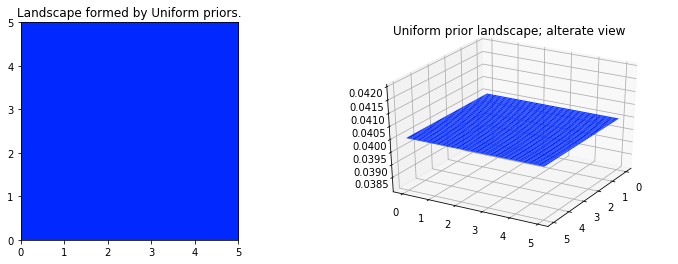

In [2]:
figsize(12.5, 4)

jet = plt.cm.jet
fig = plt.figure()
x = y = np.linspace(0, 5, 100)
X, Y = np.meshgrid(x, y)

plt.subplot(121)
uni_x = stats.uniform.pdf(x, loc=0, scale=5)
uni_y = stats.uniform.pdf(y, loc=0, scale=5)
M = np.dot(uni_x[:, None], uni_y[None, :])
im = plt.imshow(M, interpolation='none', origin='lower',
              cmap=jet, vmax=1, vmin=-.15, extent=(0, 5, 0, 5))

plt.xlim(0, 5)
plt.ylim(0, 5)
plt.title('Landscape formed by Uniform priors.')

ax = fig.add_subplot(122, projection='3d')
ax.plot_surface(X, Y, M, cmap=jet, vmax=1, vmin=-.15)
ax.view_init(azim=390)
plt.title('Uniform prior landscape; alterate view')

Text(0.5,0.92,'$Exp(3), Exp(10)$ prior landscape; \nalternate view')

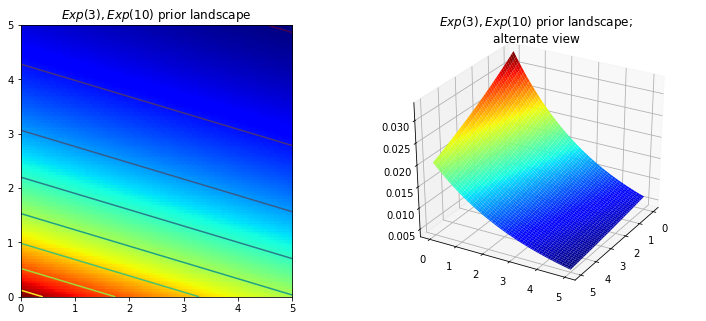

In [3]:
figsize(12.5, 5)
fig = plt.figure()
plt.subplot(121)

exp_x = stats.expon.pdf(x, scale=3)
exp_y = stats.expon.pdf(x, scale=10)
M = np.dot(exp_x[:, None], exp_y[None, :])
CS = plt.contour(X, Y, M)
im = plt.imshow(M, interpolation='none', origin='lower',
               cmap=jet, extent=(0, 5, 0, 5))

plt.title("$Exp(3), Exp(10)$ prior landscape")

ax = fig.add_subplot(122, projection='3d')
ax.plot_surface(X, Y, M, cmap=jet)
ax.view_init(azim=390)
plt.title("$Exp(3), Exp(10)$ prior landscape; \nalternate view")

In [4]:
N = 1

lambda_1_true = 1
lambda_2_true = 3

data = np.concatenate([
    stats.poisson.rvs(lambda_1_true, size=(N, 1)),
    stats.poisson.rvs(lambda_2_true, size=(N, 1))   
], axis=1)
print('observed (2-dimensional, sample size = %d):' % N, data)

x = y = np.linspace(.01, 5, 100)
likelihood_x = np.array([stats.poisson.pmf(data[:, 0], _x)
                        for _x in x]).prod(axis=1)
likelihood_y = np.array([stats.poisson.pmf(data[:, 0], _y)
                        for _y in y]).prod(axis=1)
L = np.dot(likelihood_x[:, None], likelihood_y[None, :])

observed (2-dimensional, sample size = 1): [[1 4]]


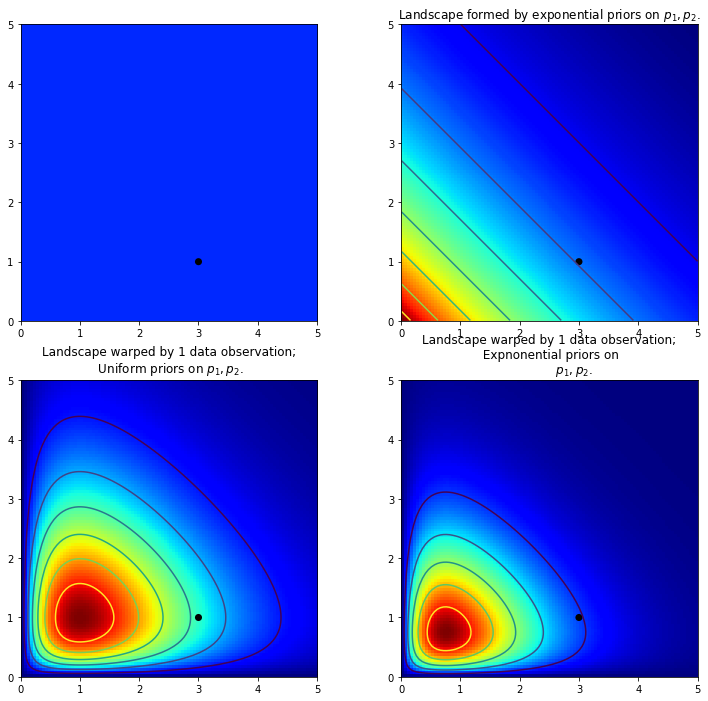

In [5]:
figsize(12.5, 12)

plt.subplot(221)
uni_x = stats.uniform.pdf(x, loc=0, scale=5)
uni_y = stats.uniform.pdf(x, loc=0, scale=5)
M = np.dot(uni_x[:, None], uni_y[None, :])
im = plt.imshow(M, interpolation='none', origin='lower',
               cmap=jet, vmax=1, vmin=-.15, extent=(0, 5, 0, 5))
plt.scatter(lambda_2_true, lambda_1_true, c='k', s=50, edgecolor='none')
plt.xlim(0, 5)
plt.ylim(0, 5)


plt.subplot(223)
plt.contour(x, y, M * L)
im = plt.imshow(M * L, interpolation='none', origin='lower',
               cmap=jet, extent=(0, 5, 0, 5))

plt.title('Landscape warped by %d data observation;\n Uniform priors on $p_1, p_2$.' % N)
plt.scatter(lambda_2_true, lambda_1_true, c='k', s=50, edgecolor='none')

plt.xlim(0, 5)
plt.ylim(0, 5)


plt.subplot(222)
exp_x = stats.expon.pdf(x, loc=0, scale=3)
exp_y = stats.expon.pdf(y, loc=0, scale=3)
M = np.dot(exp_x[:, None], exp_y[None, :])

plt.contour(x, y, M)
im = plt.imshow(M, interpolation='none', origin='lower',
               cmap=jet, extent=(0, 5, 0, 5))

plt.title('Landscape formed by exponential priors on $p_1, p_2$.')
plt.scatter(lambda_2_true, lambda_1_true, c='k', s=50, edgecolor='none')

plt.xlim(0, 5)
plt.ylim(0, 5)


plt.subplot(224)
plt.contour(x, y, M * L)
im = plt.imshow(M * L, interpolation='none', origin='lower',
               cmap=jet, extent=(0, 5, 0, 5))

plt.title("""Landscape warped by %d data observation;\n Expnonential priors on
             $p_1, p_2$.""" % N)
plt.scatter(lambda_2_true, lambda_1_true, c='k', s=50, edgecolor='none')    

plt.xlim(0, 5)
plt.ylim(0, 5);

In [6]:
figsize(12.5, 4)

[115.85679142 152.26153716 178.87449059 162.93500815 107.02820697
 105.19141146 118.38288501 125.3769803  102.88054011 206.71326136] ...


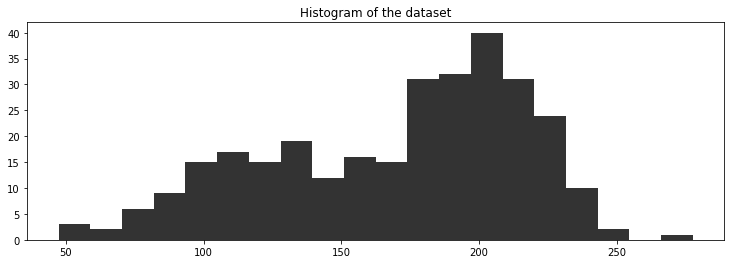

In [7]:
# need to find this dataset
data = np.loadtxt('data/mixture_data.csv', delimiter=',')

plt.hist(data, bins=20, color='k', histtype='stepfilled', alpha=.8)
plt.title('Histogram of the dataset')
plt.ylim([0, None])
print(data[:10], '...')

In [8]:
with pm.Model() as model:
    p1 = pm.Uniform('p', 0, 1)
    p2 = 1 - p1
    p = T.stack([p1, p2])
    assignment = pm.Categorical('assignment', p,
                                shape=data.shape[0],
                                testval=np.random.randint(0, 2, data.shape[0]))
print('prior assignment, with p = %.2f:' % p1.tag.test_value)
print(assignment.tag.test_value[:10])
    
    

prior assignment, with p = 0.50:
[0 1 0 0 1 0 0 0 0 1]


In [9]:
with model:
    sds = pm.Uniform('sds', 0, 100, shape=2)
    centers = pm.Normal('centers',
                       mu=np.array([120, 190]),
                       sd=np.array([10, 10]),
                       shape=2)
    center_i = pm.Deterministic('center_i', centers[assignment])
    sd_i = pm.Deterministic('sd_i', sds[assignment])
    
    # and combineit with the observations
    observations = pm.Normal('obs', mu=center_i, sd=sd_i, observed=data)
    
print('Random assignments: ', assignment.tag.test_value[:4], '...')
print('Assigned center: ', center_i.tag.test_value[:4], '...')
print('Assigned standard deviation: ', sd_i.tag.test_value[:4], '...')



Random assignments:  [0 1 0 0] ...
Assigned center:  [120. 190. 120. 120.] ...
Assigned standard deviation:  [50. 50. 50. 50.] ...


In [10]:
with model:
    step1 = pm.Metropolis(vars=[p, sds, centers])
    step2 = pm.ElemwiseCategorical(vars=[assignment])
    trace = pm.sample(25000, step=[step1, step2])
    

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel/__main__.py:3: DeprecationWarning: ElemwiseCategorical is deprecated, switch to CategoricalGibbsMetropolis.
  app.launch_new_instance()
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>CompoundStep
>>Metropolis: [centers]
>>Metropolis: [sds_interval__]
>>Metropolis: [p_interval__]
>ElemwiseCategorical: [assignment]
100%|██████████| 25500/25500 [02:51<00:00, 149.07it/s]
The number of effective samples is smaller than 10% for some parameters.


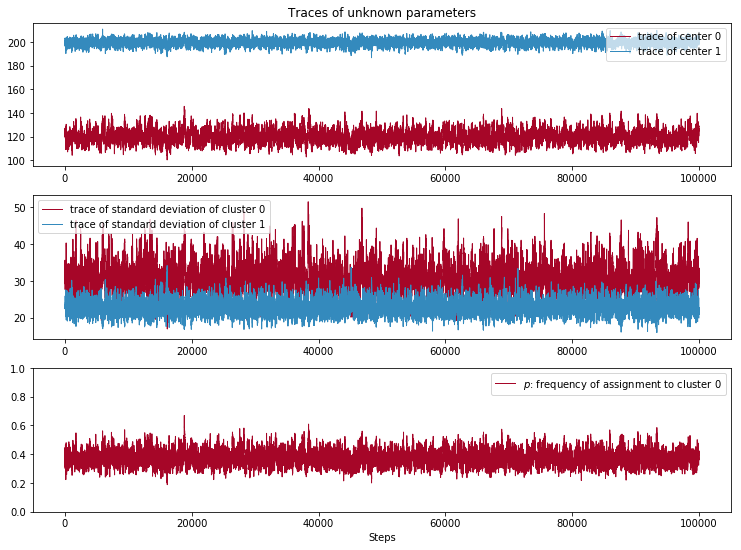

In [11]:
figsize(12.5, 9)
plt.subplot(311)
lw = 1
center_trace =trace['centers']

colors = ["#348ABD", "#A60628"] if center_trace[-1, 0] > center_trace[-1, 1] \
    else ["#A60628", "#348ABD"]
    
plt.plot(center_trace[:, 0], label='trace of center 0', c=colors[0], lw=lw)
plt.plot(center_trace[:, 1], label='trace of center 1', c=colors[1], lw=lw)
plt.title('Traces of unknown parameters')
leg = plt.legend(loc='upper right')
leg.get_frame().set_alpha(0.7)

plt.subplot(312)
std_trace = trace['sds']
plt.plot(std_trace[:, 0], label='trace of standard deviation of cluster 0', c=colors[0], lw=lw)
plt.plot(std_trace[:, 1], label='trace of standard deviation of cluster 1', c=colors[1], lw=lw)
plt.legend(loc='upper left')

plt.subplot(313)
p_trace =trace['p']
plt.plot(p_trace, label='$p$: frequency of assignment to cluster 0', c=colors[0], lw=lw)
plt.xlabel('Steps')
plt.ylim(0, 1)
plt.legend();

In [13]:
with model:
    trace = pm.sample(5000, step=[step1, step2], trace=trace)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>CompoundStep
>>Metropolis: [centers]
>>Metropolis: [sds_interval__]
>>Metropolis: [p_interval__]
>ElemwiseCategorical: [assignment]
100%|██████████| 5500/5500 [00:38<00:00, 143.39it/s]


KeyboardInterrupt: 

ValueError: x and y must have same first dimension, but have shapes (50000,) and (75000,)

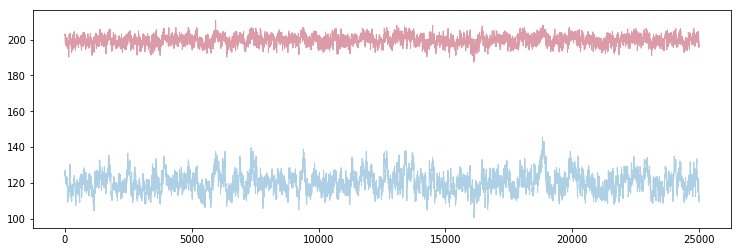

In [14]:
figsize(12.5, 4)
center_trace = trace['centers'][25000:]
prev_center_trace = trace['centers'][:25000]

x = np.arange(25000)
plt.plot(x, prev_center_trace[:, 0], label='previous trace of center 0',
        lw=lw, alpha=.4, c=colors[1])
plt.plot(x, prev_center_trace[:, 1], label='previous trace of center 1',
        lw=lw, alpha=.4, c=colors[0])

x = np.arange(25000, 75000)
plt.plot(x, center_trace[:, 0], label='new trace of center 0',
        lw=lw, c=colors[0])
plt.plot(x, center_trace[:, 1], label='new trace of center 1',
        lw=lw, c=colors[1])
plt.title('Traces of unknown center parameters')
leg = plt.legend(loc='upper right')
leg.get_frame().set_alpha(.8)
plt.xlabel('Steps');


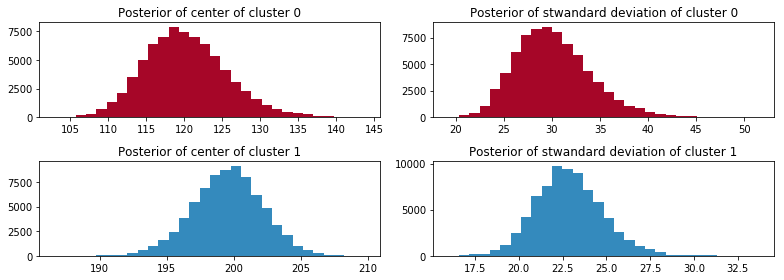

In [15]:
# investigate clusters
figsize(11, 4)
std_trace = trace['sds'][25000:]
prev_std_trace = trace['sds'][:25000]

_i = [1, 2, 3, 4]
for i in range(2):
    plt.subplot(2, 2, _i[2 * i])
    plt.title('Posterior of center of cluster %d' % i)
    plt.hist(center_trace[:, i], color=colors[i], bins=30,
            histtype='stepfilled')

    plt.subplot(2, 2, _i[2 * i + 1])
    plt.title('Posterior of stwandard deviation of cluster %d' % i)
    plt.hist(std_trace[:, i], color=colors[i], bins=30,
            histtype='stepfilled')
plt.tight_layout()

AttributeError: module 'matplotlib.pyplot' has no attribute 'xabel'

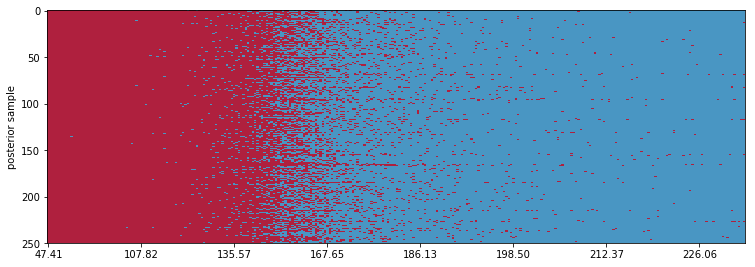

In [22]:
import matplotlib as mpl
figsize(12.5, 4.5)
plt.cmap = mpl.colors.ListedColormap(colors)
plt.imshow(trace['assignment'][::400, np.argsort(data)],
          cmap=plt.cmap, aspect=.4, alpha=.9)
plt.xticks(np.arange(0, data.shape[0], 40),
          ['%.2f' % s for s in np.sort(data)[::40]])
plt.ylabel('posterior sample')
plt.xabel('value of $i$th data point')
plt.title('Posterior labels of data points')


(-0.05, 1.05)

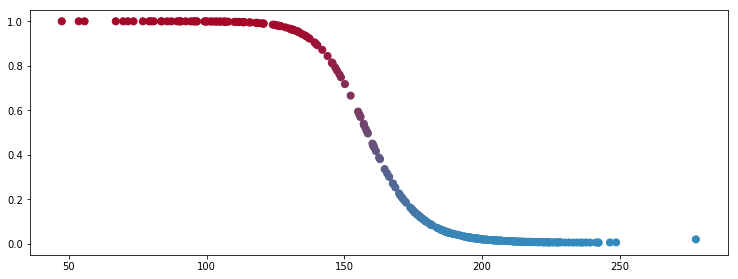

In [21]:
cmap = mpl.colors.LinearSegmentedColormap.from_list('BMH', colors)
assign_trace = trace['assignment']
plt.scatter(data, 1-assign_trace.mean(axis=0), cmap=cmap,
           c=assign_trace.mean(axis=0), s=50)
plt.ylim(-.05, 1.05)

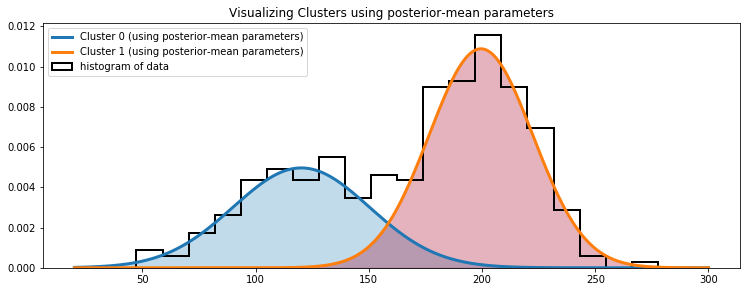

In [20]:
norm = stats.norm
x = np.linspace(20, 300, 500)
posterior_center_means = center_trace.mean(axis=0)
posterior_std_means = std_trace.mean(axis=0)
posterior_p_mean = trace['p'].mean()

plt.hist(data, bins=20, histtype='step', density=True,
         color='k', lw=2, label='histogram of data')
y = posterior_p_mean * norm.pdf(x, loc=posterior_center_means[0],
                               scale=posterior_std_means[0])
plt.plot(x, y, label='Cluster 0 (using posterior-mean parameters)', lw=3)
plt.fill_between(x, y, color=colors[1], alpha=.3)

y = (1 - posterior_p_mean) * norm.pdf(x, loc=posterior_center_means[1],
                                     scale=posterior_std_means[1])
plt.plot(x, y, label='Cluster 1 (using posterior-mean parameters)', lw=3)
plt.fill_between(x, y, color=colors[0], alpha=.3)

plt.legend(loc='best')
plt.title('Visualizing Clusters using posterior-mean parameters');


Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [x]
100%|██████████| 10500/10500 [00:01<00:00, 9167.58it/s]
The number of effective samples is smaller than 25% for some parameters.


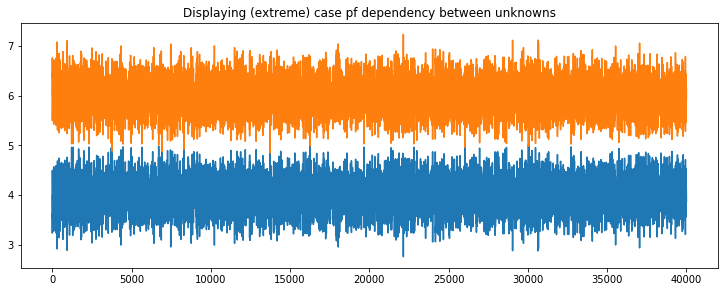

In [23]:
with pm.Model() as model:
    x = pm.Normal('x', mu=4, tau=10)
    y = pm.Deterministic('y', 10 - x)
    trace_2 = pm.sample(10000, pm.Metropolis())
    

plt.plot(trace_2['x'])
plt.plot(trace_2['y'])
plt.title('Displaying (extreme) case pf dependency between unknowns');